In [1]:
# import các thư viện cơ bản
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Load dataset từ Google Drive
df = pd.read_csv('/content/drive/MyDrive/dữ liệu chuẩn đoán - heart_disease.csv.csv')
#df = pd.read_csv('//content/drive/MyDrive/Heart_Disease_Prediction/heart_disease.csv')

In [4]:
# Xem 5 dòng đầu tập dữ liệu
df.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


## Kiểm tra dữ liệu

In [5]:
df.shape

(10090, 16)

In [6]:
df.nunique()

Gender                2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1368
heartRate            73
glucose             143
Heart_ stroke         2
dtype: int64

Dữ liệu ban đầu có 4238 dòng và 16 thuộc tính


In [7]:
# Xem các thuộc tính
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

Tổng cộng ta có 16 thuộc tính, bao gồm:
1.	Gender:	Giới tính
2.	education:	Trình độ học vấn
3.	age:	Độ tuổi
4.	currentSmoker:	Bệnh nhân hiện tại có hút thuốc hay không
5.	cigsPerDay:	Số điếu thuốc hút trong 1 ngày
6.	BPMeds:	Bệnh nhân có dùng thuốc huyết áp hay không
7.	prevalentStroke:	Bệnh nhân có từng bị đột quỵ hay không
8.	prevalentHyp:	Bệnh nhân có bị tăng huyết áp hay không
9.	diabetes:	Bệnh nhân có bị tiểu đường hay không
10.	totChol:	Mức cholesterol toàn phần <5.1 là bình tường, >6.2 là cao
11.	sysBP:	Huyết áp tâm thu 90-120
12.	diaBP:	Huyết áp tâm trương 60-79
13.	BMI:	Chỉ số khối cơ thể 16-40 (18.5-25 là bình thường)
14.	heartRate:	Nhip tim 60-100
15.	glucose:	Mức glucose bình thường <100 trước khi ăn, <140 sau khi ăn, <140 ở lúc bất kì.
16.	Heart_ stroke:	Khả năng bệnh Tim-Đột quỵ (Phân loại)



In [8]:
#Xem những kiểu dữ liệu của thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10090 non-null  object 
 1   age              10090 non-null  int64  
 2   education        9841 non-null   object 
 3   currentSmoker    10090 non-null  int64  
 4   cigsPerDay       10028 non-null  float64
 5   BPMeds           9967 non-null   float64
 6   prevalentStroke  10090 non-null  object 
 7   prevalentHyp     10090 non-null  int64  
 8   diabetes         10090 non-null  int64  
 9   totChol          9970 non-null   float64
 10  sysBP            10090 non-null  float64
 11  diaBP            10090 non-null  float64
 12  BMI              10046 non-null  float64
 13  heartRate        10086 non-null  float64
 14  glucose          9166 non-null   float64
 15  Heart_ stroke    10090 non-null  object 
dtypes: float64(8), int64(4), object(4)
memory usage: 1.2+ MB


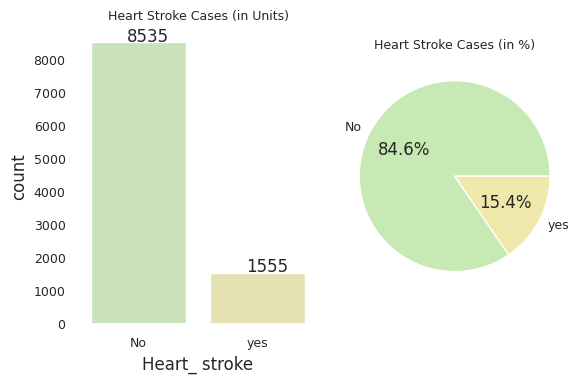

In [9]:
#Kiểm tra giá trị của biến mục tiêu
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':9,'ytick.labelsize':9, 'figure.autolayout':True})
my_col = ('#c7e9b4', '#EEE8AA')

plt.figure(figsize=(6,4))

## Heart Stroke Cases (in Units)

plt.subplot(1,2,1)

plt.title('Heart Stroke Cases (in Units)', fontdict={'fontsize':9})
ax = sns.countplot(x="Heart_ stroke", data=df, palette=my_col, order=df['Heart_ stroke'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+8))

## Heart Stroke Cases (in %)

plt.subplot(1,2,2)
plt.title('Heart Stroke Cases (in %)', fontdict={'fontsize':9})
df['Heart_ stroke'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
plt.savefig("count_class.jpeg", format='jpeg', dpi=100)
# files.download('count_class.jpeg')
plt.show()

## Xử lý dữ liệu

In [10]:
#Kiểm tra dữ liệu
pd.isna(df).sum()[pd.isna(df).sum() > 0]

education     249
cigsPerDay     62
BPMeds        123
totChol       120
BMI            44
heartRate       4
glucose       924
dtype: int64

In [11]:
#Xử lý dữ liệu null
## Null values in numerical variables
df.glucose.fillna(df.glucose.median(),inplace = True)
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace = True)
df.totChol.fillna(df.totChol.median(),inplace = True)
df.BMI.fillna(df.BMI.median(),inplace = True)
df.heartRate.fillna(df.heartRate.median(),inplace = True)

## Null values in categorical variables
df.education = df.education.fillna(df.education.mode().iloc[0])
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mode().iloc[0])

In [12]:
#Kiểm tra lại dữ liệu sau khi xử lý
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10090 non-null  object 
 1   age              10090 non-null  int64  
 2   education        10090 non-null  object 
 3   currentSmoker    10090 non-null  int64  
 4   cigsPerDay       10090 non-null  float64
 5   BPMeds           10090 non-null  float64
 6   prevalentStroke  10090 non-null  object 
 7   prevalentHyp     10090 non-null  int64  
 8   diabetes         10090 non-null  int64  
 9   totChol          10090 non-null  float64
 10  sysBP            10090 non-null  float64
 11  diaBP            10090 non-null  float64
 12  BMI              10090 non-null  float64
 13  heartRate        10090 non-null  float64
 14  glucose          10090 non-null  float64
 15  Heart_ stroke    10090 non-null  object 
dtypes: float64(8), int64(4), object(4)
memory usage: 1.2+ MB


Sau khi xử lý dữ liệu null, ta tiến hành kiểm tra các giá trị các thuộc tính

<Axes: xlabel='Heart_ stroke'>

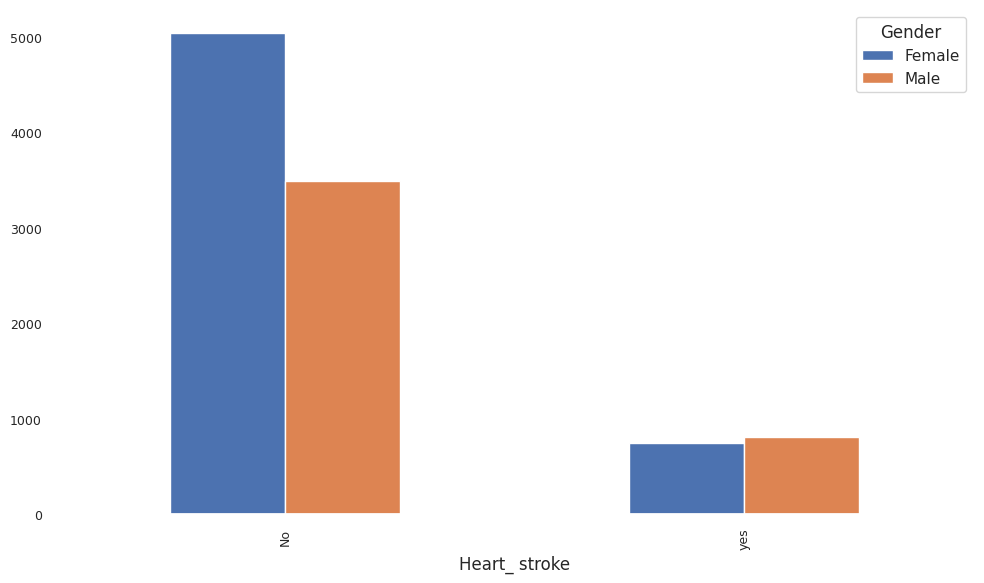

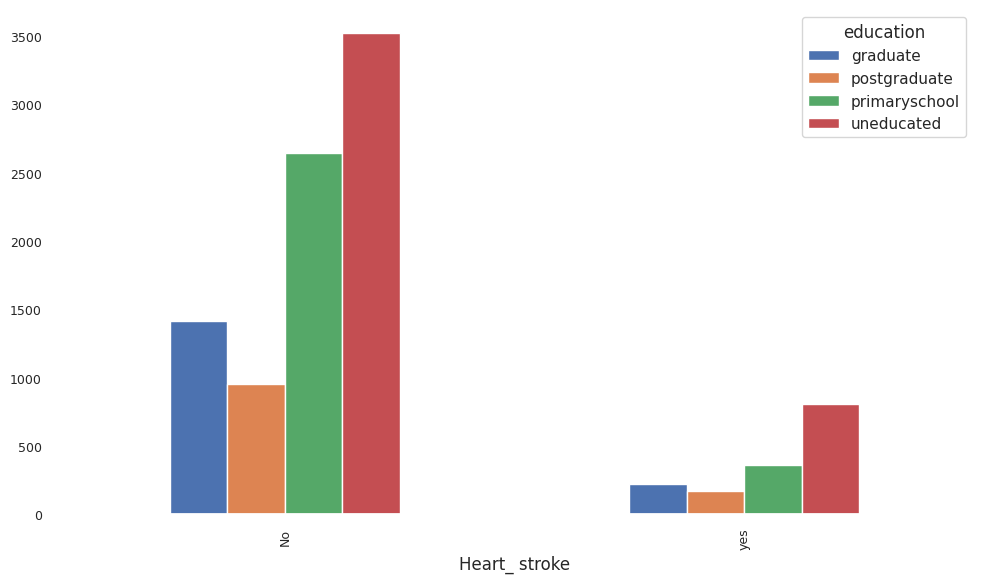

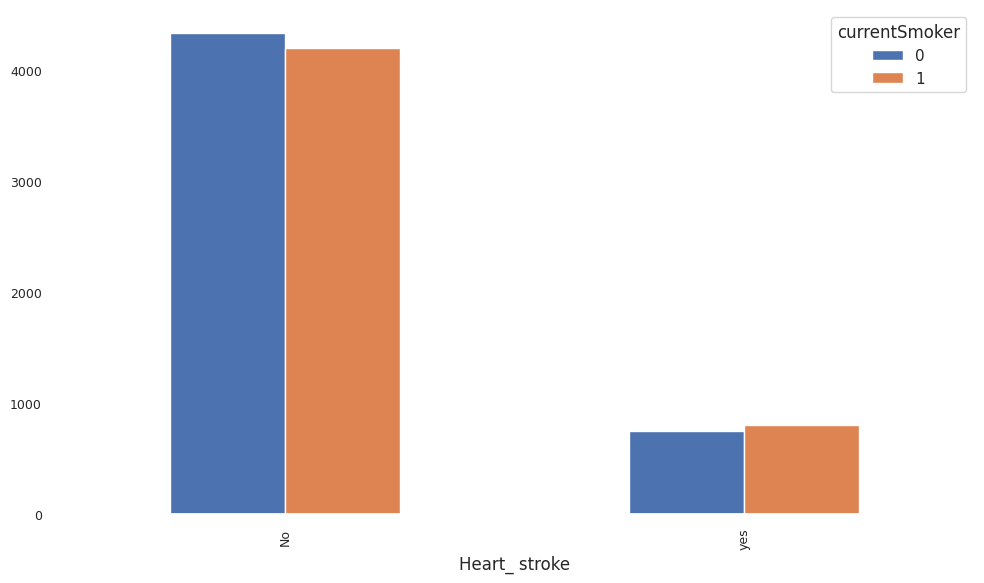

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


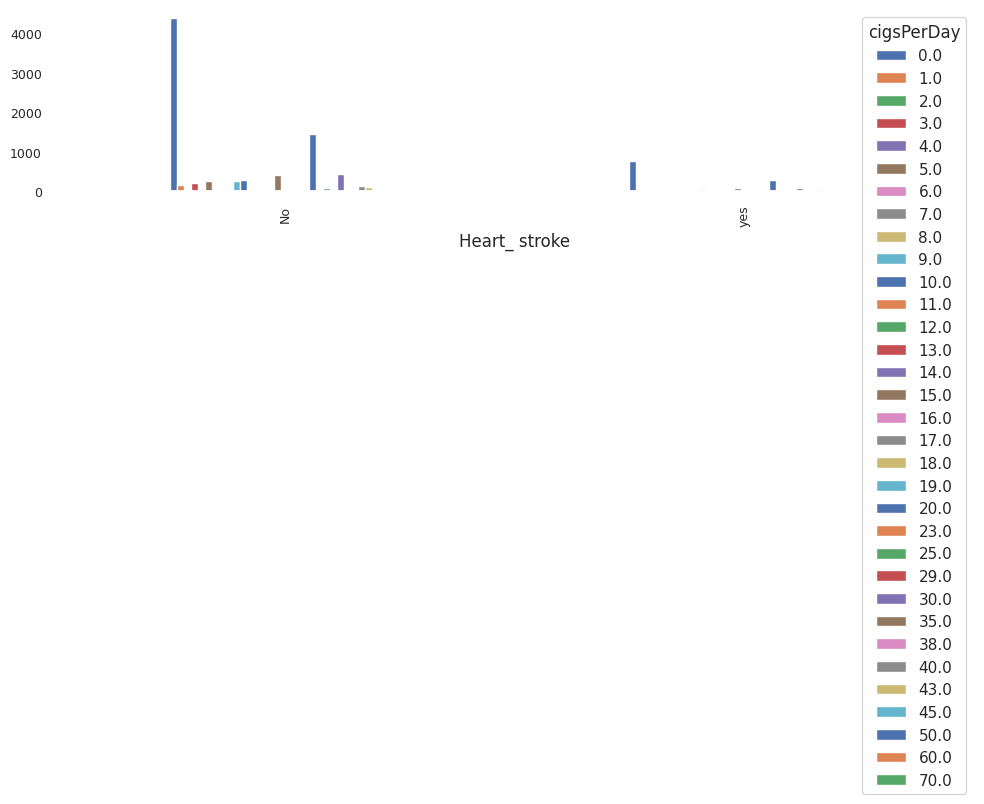

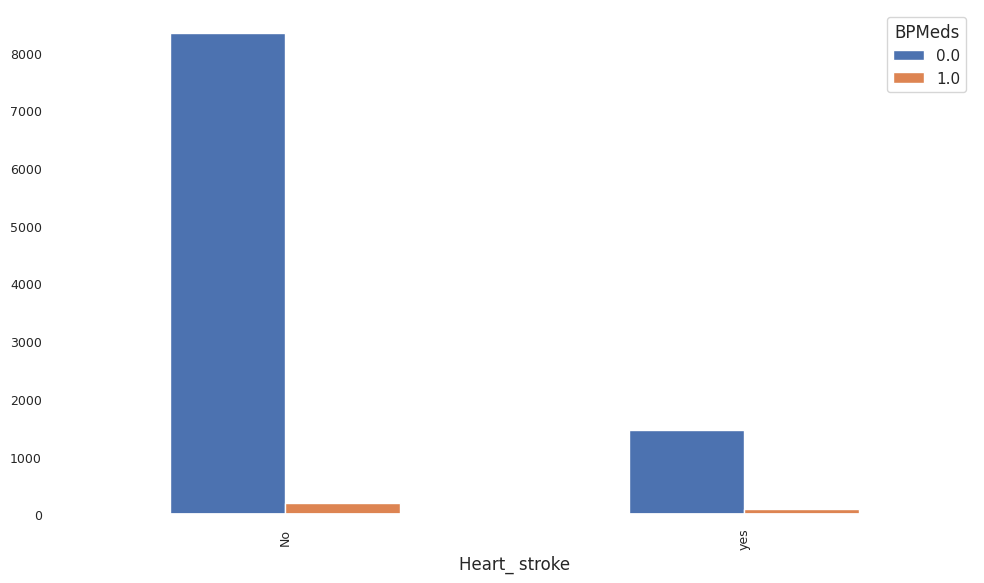

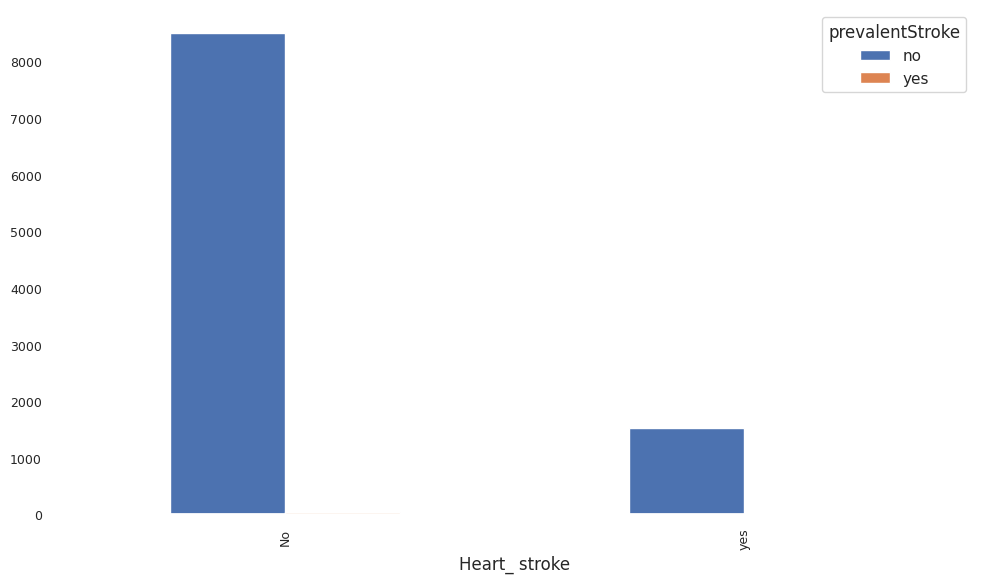

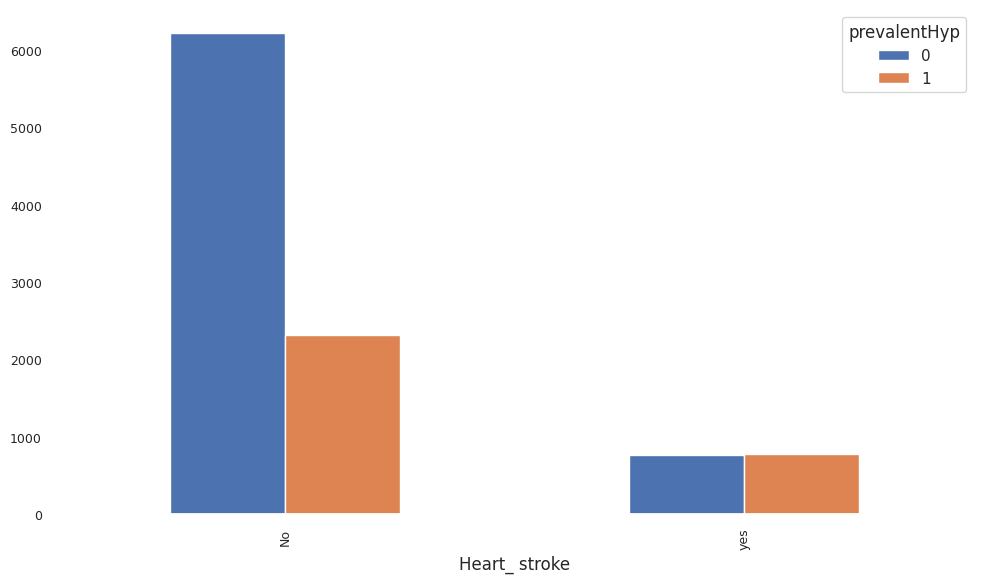

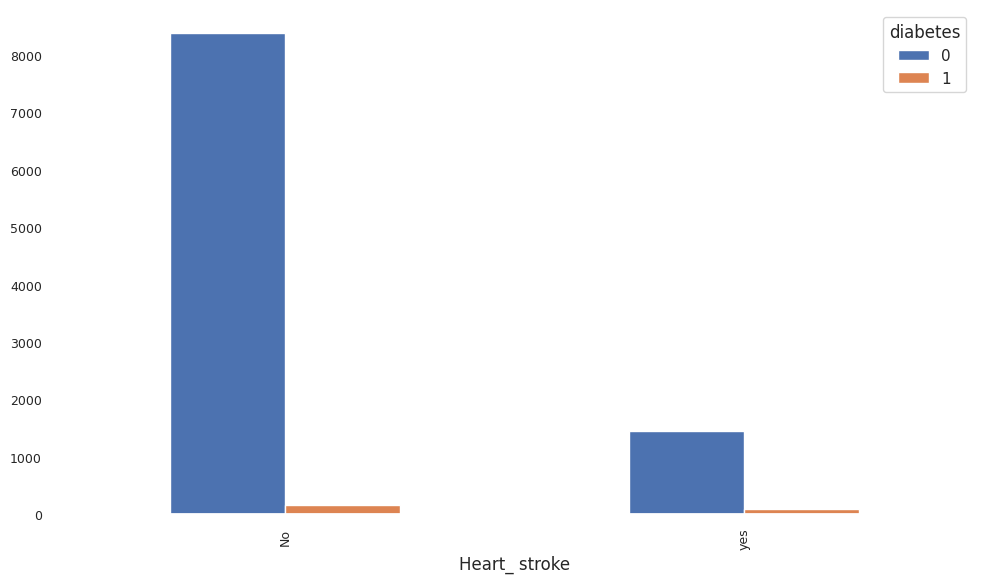

In [13]:

class_Gender = pd.crosstab(df['Heart_ stroke'], df['Gender'])
class_Gender.plot(kind = 'bar',figsize=(10, 6))

class_education = pd.crosstab(df['Heart_ stroke'], df['education'])
class_education.plot(kind = 'bar',figsize=(10, 6))

class_currentSmoker = pd.crosstab(df['Heart_ stroke'], df['currentSmoker'])
class_currentSmoker.plot(kind = 'bar',figsize=(10, 6))

class_cigsPerDay = pd.crosstab(df['Heart_ stroke'], df['cigsPerDay'])
class_cigsPerDay.plot(kind = 'bar',figsize=(10, 6))

class_BPMeds = pd.crosstab(df['Heart_ stroke'], df['BPMeds'])
class_BPMeds.plot(kind = 'bar',figsize=(10, 6))

class_prevalentStroke = pd.crosstab(df['Heart_ stroke'], df['prevalentStroke'])
class_prevalentStroke.plot(kind = 'bar',figsize=(10, 6))

class_prevalentHyp = pd.crosstab(df['Heart_ stroke'], df['prevalentHyp'])
class_prevalentHyp.plot(kind = 'bar',figsize=(10, 6))

class_diabetes = pd.crosstab(df['Heart_ stroke'], df['diabetes'])
class_diabetes.plot(kind = 'bar',figsize=(10, 6))

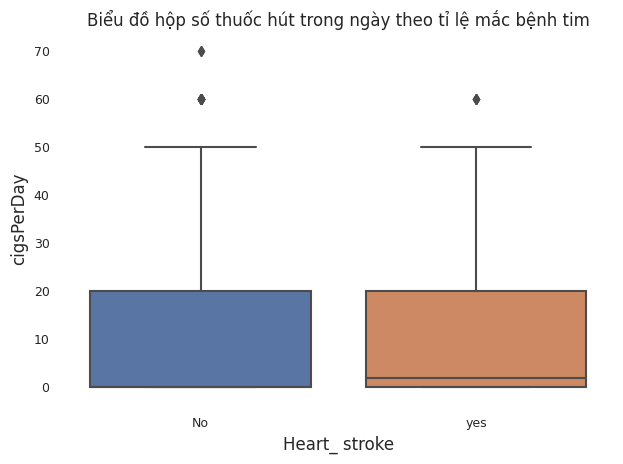

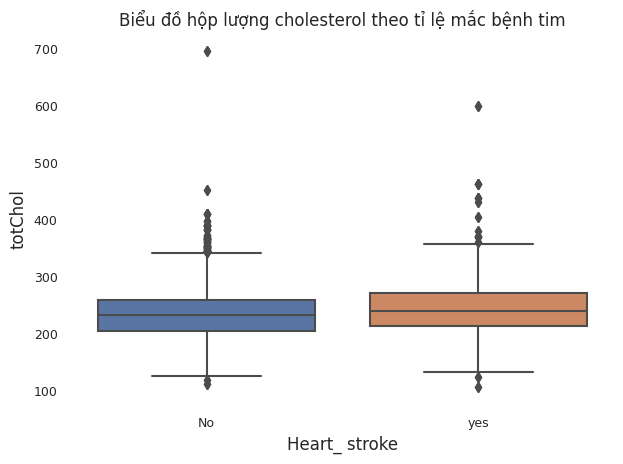

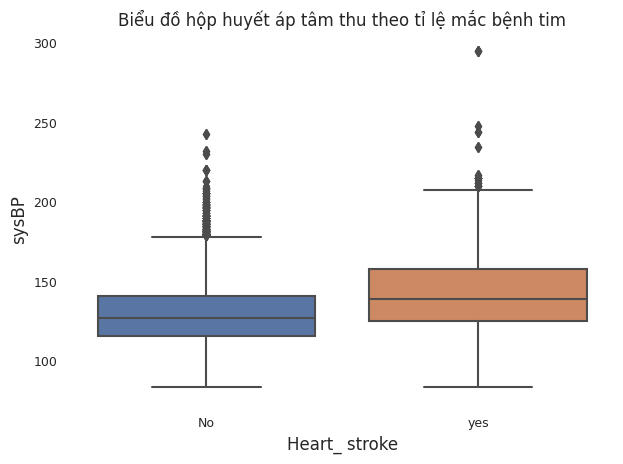

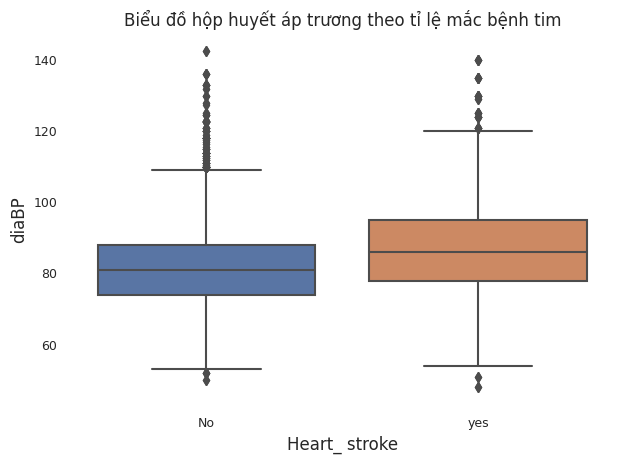

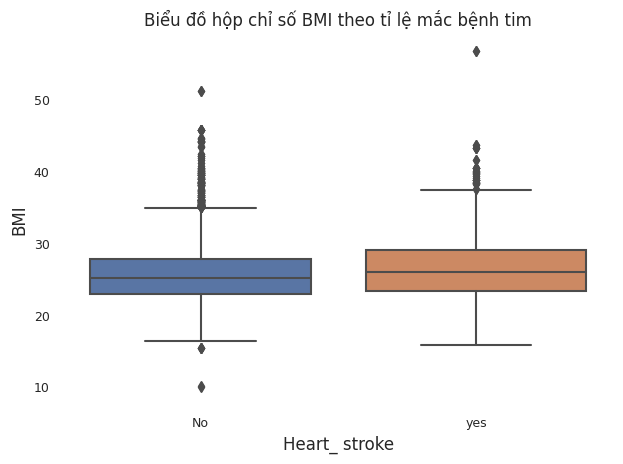

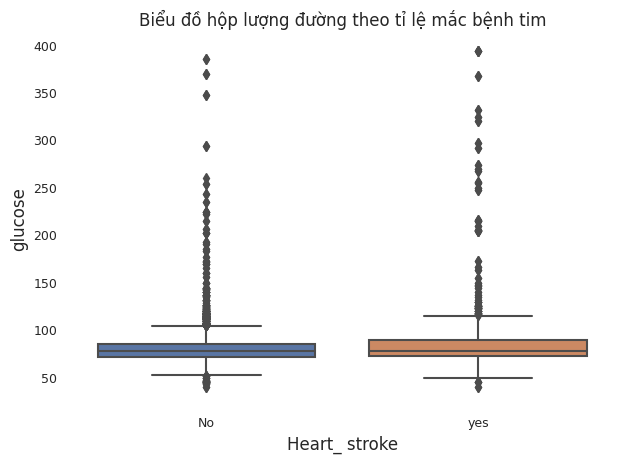

In [14]:


sns.boxplot(x='Heart_ stroke', y='cigsPerDay', data=df)
plt.title("Biểu đồ hộp số thuốc hút trong ngày theo tỉ lệ mắc bệnh tim")
plt.show()


sns.boxplot(x='Heart_ stroke', y='totChol', data=df)
plt.title("Biểu đồ hộp lượng cholesterol theo tỉ lệ mắc bệnh tim")
plt.show()


sns.boxplot(x='Heart_ stroke', y='sysBP', data=df)
plt.title("Biểu đồ hộp huyết áp tâm thu theo tỉ lệ mắc bệnh tim")
plt.show()


sns.boxplot(x='Heart_ stroke', y='diaBP', data=df)
plt.title("Biểu đồ hộp huyết áp trương theo tỉ lệ mắc bệnh tim")
plt.show()


sns.boxplot(x='Heart_ stroke', y='BMI', data=df)
plt.title("Biểu đồ hộp chỉ số BMI theo tỉ lệ mắc bệnh tim")
plt.show()


sns.boxplot(x='Heart_ stroke', y='glucose', data=df)
plt.title("Biểu đồ hộp lượng đường theo tỉ lệ mắc bệnh tim")
plt.show()

In [15]:
#Tiến hành xóa bỏ dữ liệu ngoại lai
# Remove outlier
cols_outlier = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in cols_outlier:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  IQR=q3-q1
  lowerLimit = q1 - 1.5 * IQR
  upperLimit = q3 + 1.5 * IQR
  df = df[df[i]< upperLimit]
  df = df[df[i]> lowerLimit]

In [16]:
## Tiến hành nhóm các thuộc tính số & thuộc tính phân loại để đưa về dạng số

num_df = df[[ 'cigsPerDay','heartRate','age','totChol','BMI','sysBP','diaBP','glucose']]
cat_df = df[['Gender','diabetes','BPMeds', 'prevalentStroke', 'prevalentHyp','Heart_ stroke']]

In [17]:
## Thư viện hỗ trợ xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [18]:
## Chuyển đổi các dữ liệu chữ thành số

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()

#select categorical columns
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

#joining the data to the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)
main_df.head(5)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,education,prevalentStroke,Heart_ stroke
0,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,1,0,0
1,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,2,0,0
2,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,3,0,0
3,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,0,0,1
4,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,0


## Oversampling

Do dữ liệu đang bị mất cân bằng nên ta sẽ sử dụng kỹ thuật Oversampling
Oversampling trong học máy (machine learning) là một kỹ thuật để thay đổi các lớp (class) của dữ liệu không bằng nhau để tạo ra các tập dữ liệu cân bằng (balanced dataset).
Kỹ thuật này cố gắng tăng kích thước của các mẫu (sample) hiếm để tạo ra sự cân bằng khi dữ liệu không đủ.

In [19]:
from sklearn.utils import resample
#lấy mẫu lại
print('Dữ liệu trước khi resample: \n',main_df['Heart_ stroke'].value_counts())
# Phân biệt có bị bệnh tim hay không
not_heart_stroke= main_df[(main_df['Heart_ stroke'] == 0)]
heart_stroke = main_df[(main_df['Heart_ stroke'] == 1)]

# upsample minority
heart_stroke_upsampled = resample(heart_stroke,
                          replace=True, # sample with replacement
                          n_samples=len(not_heart_stroke), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_heart_stroke, heart_stroke_upsampled])

# check new class counts
print('Dữ liệu trước sau resample: \n',upsampled['Heart_ stroke'].value_counts())

Dữ liệu trước khi resample: 
 0    7496
1    1169
Name: Heart_ stroke, dtype: int64
Dữ liệu trước sau resample: 
 0    7496
1    7496
Name: Heart_ stroke, dtype: int64


In [20]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000,8665.000000
mean,48.925793,0.506636,9.329025,0.019619,0.257588,0.004962,233.816388,128.772245,81.343451,25.357789,74.629660,77.937565
std,8.501624,0.499985,12.121066,0.138696,0.437331,0.070274,39.904796,17.868204,10.275956,3.456118,10.778549,9.832714
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,53.000000,16.480000,45.000000,53.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.910000,67.000000,72.000000
50%,48.000000,1.000000,1.000000,0.000000,0.000000,0.000000,232.000000,126.000000,81.000000,25.140000,75.000000,78.000000
75%,55.000000,1.000000,20.000000,0.000000,1.000000,0.000000,260.000000,139.500000,88.000000,27.660000,80.000000,84.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,345.000000,183.000000,110.000000,35.200000,104.000000,104.000000


In [21]:
## Kiểm tra mối tương quan giữa các thuộc tính với biên mục tiêu
corr_matrix = upsampled.corr()
corr_matrix['Heart_ stroke'].sort_values(ascending=False)

Heart_ stroke      1.000000
age                0.304096
sysBP              0.238168
prevalentHyp       0.202567
diaBP              0.136890
Gender             0.121334
totChol            0.118595
cigsPerDay         0.093896
BMI                0.084597
education          0.072057
prevalentStroke    0.057497
BPMeds             0.051737
currentSmoker      0.051163
glucose            0.024966
diabetes           0.022462
heartRate         -0.007163
Name: Heart_ stroke, dtype: float64

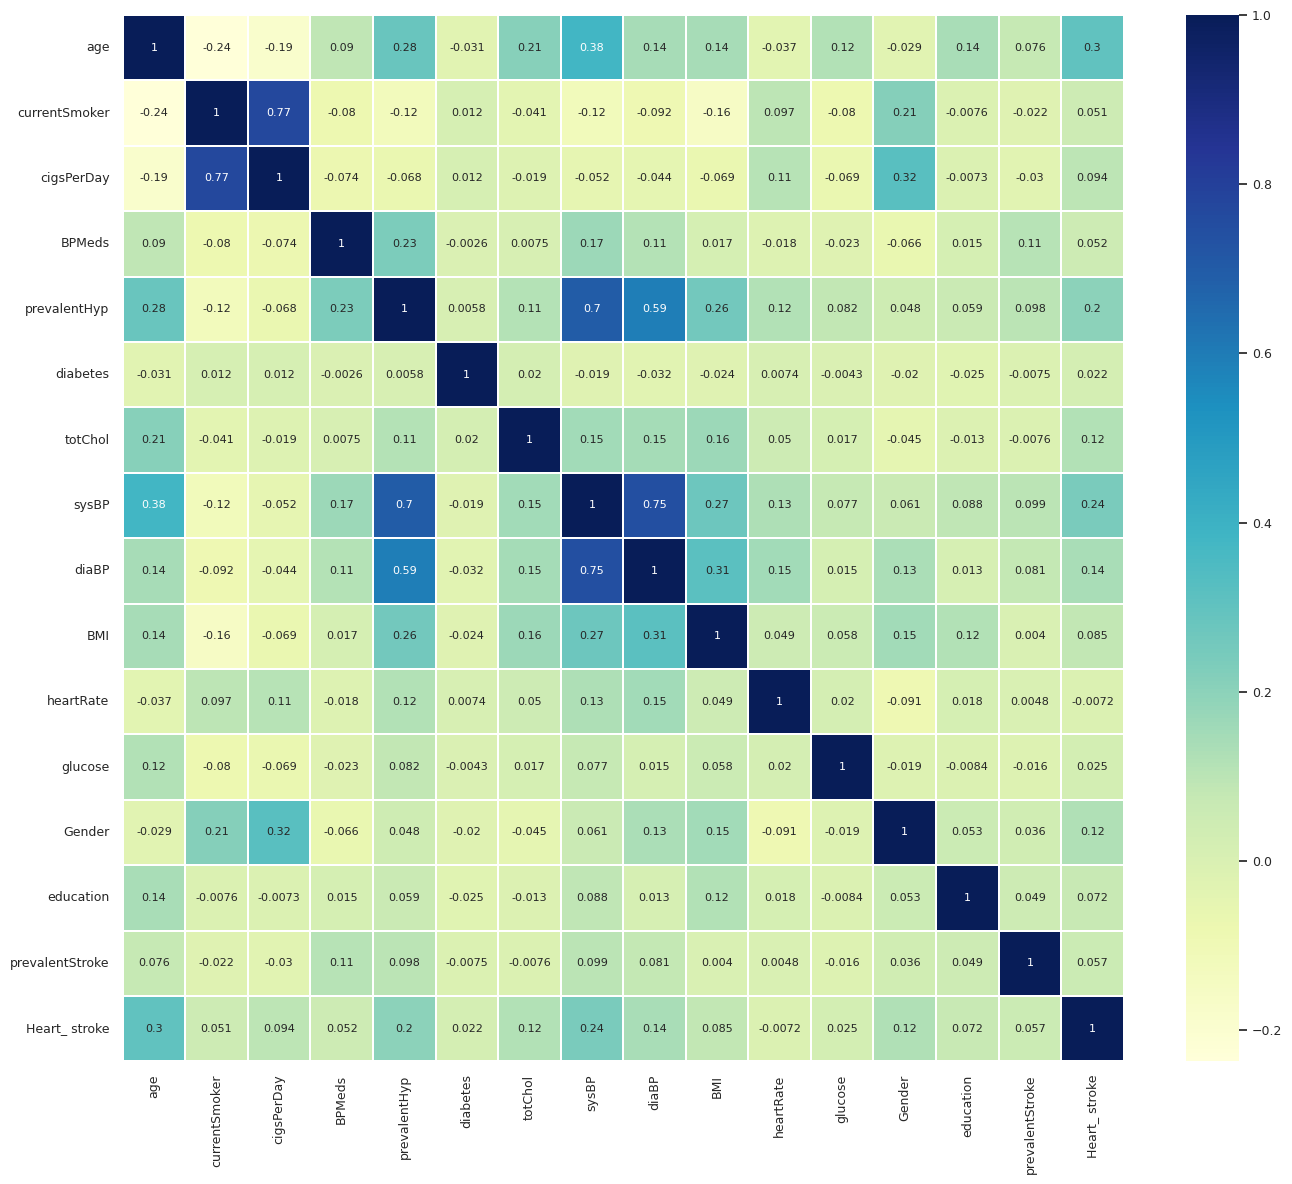

In [22]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(upsampled.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
#files.download('corr.png')
plt.show()

In [23]:
#loại bỏ biến mục tiêu
X = upsampled.drop(columns=["Heart_ stroke"])

y = upsampled["Heart_ stroke"]

X.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,education,prevalentStroke
0,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,1,0
1,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,2,0
2,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,3,0
4,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0
5,43,0,0.0,0.0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,2,0


In [24]:
## Chia tập dữ liệu ra 80 % train, 20% test
from sklearn.model_selection import train_test_split
## We split the data into train & test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
#có thể hiện tập train ra bằng X_train
print('='*34, '\n', f'\033[94mTrain data & Test data shapes', '\n', f'\033[94m '*14, f'\033[94mX            y')
print('='*34, '\n', f'\033[94mTrain data | ', X_train.shape, y_train.shape, '\n', f'\033[94mTest data  | ', X_test.shape, y_test.shape)

 Train data & Test data shapes 
                X            y
 Train data |  (11993, 15) (11993,) 
 Test data  |  (2999, 15) (2999,)


In [25]:

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_val_predict, cross_val_score

for i in range(1,21):
    dt = DT(criterion='gini',random_state=42,max_depth=i)
    dt.fit(X_train, y_train)
    print("=============================")
    print("TEST RESULTS GINI DEPTH =20 ",i,"\n")
    y_pred_dt = dt.predict(X_test)
    #Report
    print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred_dt)))
    res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
    #Độ chính xác trung bình
    print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
    #Độ lệch chuẩn
    print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
    #Ma trận hỗn hợp
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))
    #Điểm chính xác
    print("Accuracy Score:\t\t{}%".format(round(dt.score(X_test, y_test)*100, 2)))

TEST RESULTS GINI DEPTH =20  1 

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1500
           1       0.62      0.71      0.66      1499

    accuracy                           0.63      2999
   macro avg       0.64      0.63      0.63      2999
weighted avg       0.64      0.63      0.63      2999


Average Accuracy:	0.6289

Standard Deviation:	0.0177

Confusion Matrix:
[[ 836  664]
 [ 438 1061]]

Accuracy Score:		63.25%
TEST RESULTS GINI DEPTH =20  2 

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1500
           1       0.62      0.71      0.66      1499

    accuracy                           0.63      2999
   macro avg       0.64      0.63      0.63      2999
weighted avg       0.64      0.63      0.63      2999


Average Accuracy:	0.6259

Standard Deviation:	0.0188

Confusion Matrix:
[[ 836  664]
 

In [27]:
#Import thư viện cây quyết định
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(criterion='gini',random_state=42, max_depth=21)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=21, random_state=42)

In [28]:
#lấy cây vừa tạo để test dữ liệu
#y_pred_dt = dt.predict(X_test)

In [29]:
  #  #hiển thị kết quả tốt nhất
  #   #print("TEST RESULTS \n")
  #   y_pred_dt = dt.predict(X_test)
  #   #Report
  #   print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred_dt)))
  #   res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
  #   #Độ chính xác trung bình
  #   print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
  #   #Độ lệch chuẩn
  #   print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
  #   #Ma trận hỗn hợp
  #   print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))
  #   #Điểm chính xác
  #   print("Accuracy Score:\t\t{}%".format(round(dt.score(X_test, y_test)*100, 2)))

In [30]:
# Xác thực chéo
# Độ chính xác sau khi test 10 lần của Decision Tree
scores = cross_val_score(dt, X, y, cv=10)
print(scores);
print(f'Average accuracy: {scores.mean():.2f}')

[0.988      0.99333333 0.99866578 0.99332889 0.98532355 0.99866578
 0.99599733 0.99666444 0.99799867 0.98132088]
Average accuracy: 0.99


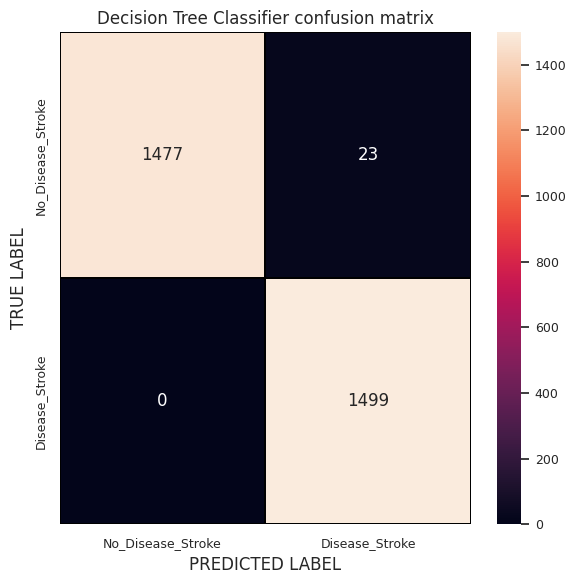

In [31]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
#No_Disease_Stroke: 0 , Disease_Stroke: 1
cfm_dt = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["No_Disease_Stroke", "Disease_Stroke"]
y_axis_labels = ["No_Disease_Stroke", "Disease_Stroke"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("dtcm.png", format='png', dpi=150, bbox_inches='tight')
#files.download('dtcm.png')
plt.show()

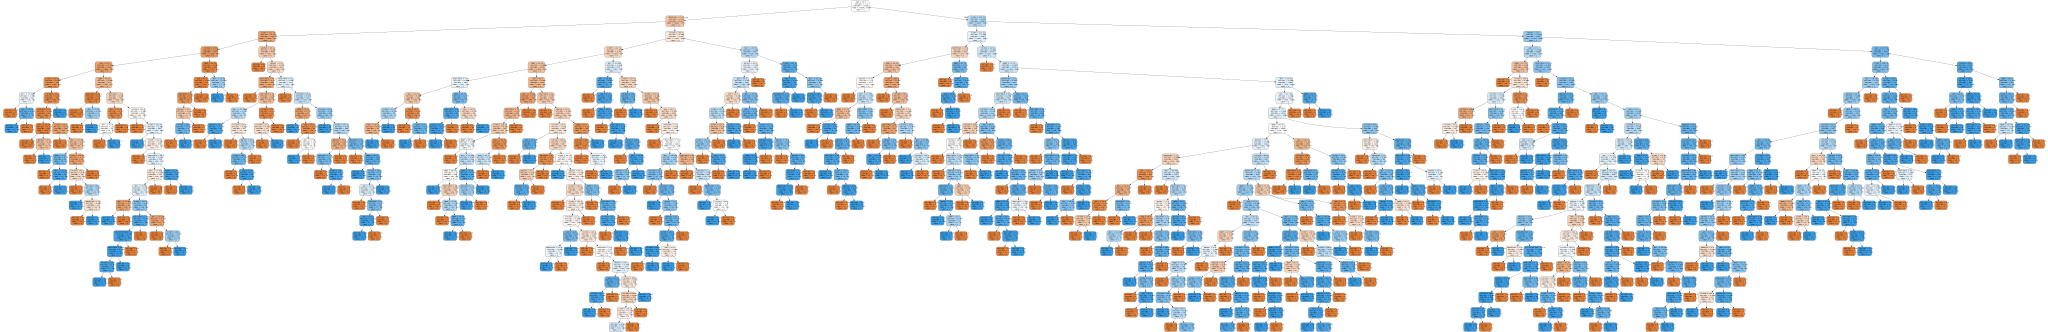

In [32]:
from sklearn.tree import DecisionTreeClassifier as clf
from sklearn.tree import export_graphviz
import graphviz
Y_name = ['0','1']

classifier_dt_tree  = clf(criterion='entropy',random_state=42, max_depth=21)
classifier_dt_tree.fit(X_train, y_train)

dot_data = export_graphviz(classifier_dt_tree, out_file=None,
                         feature_names=X.columns,
                         class_names=Y_name,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

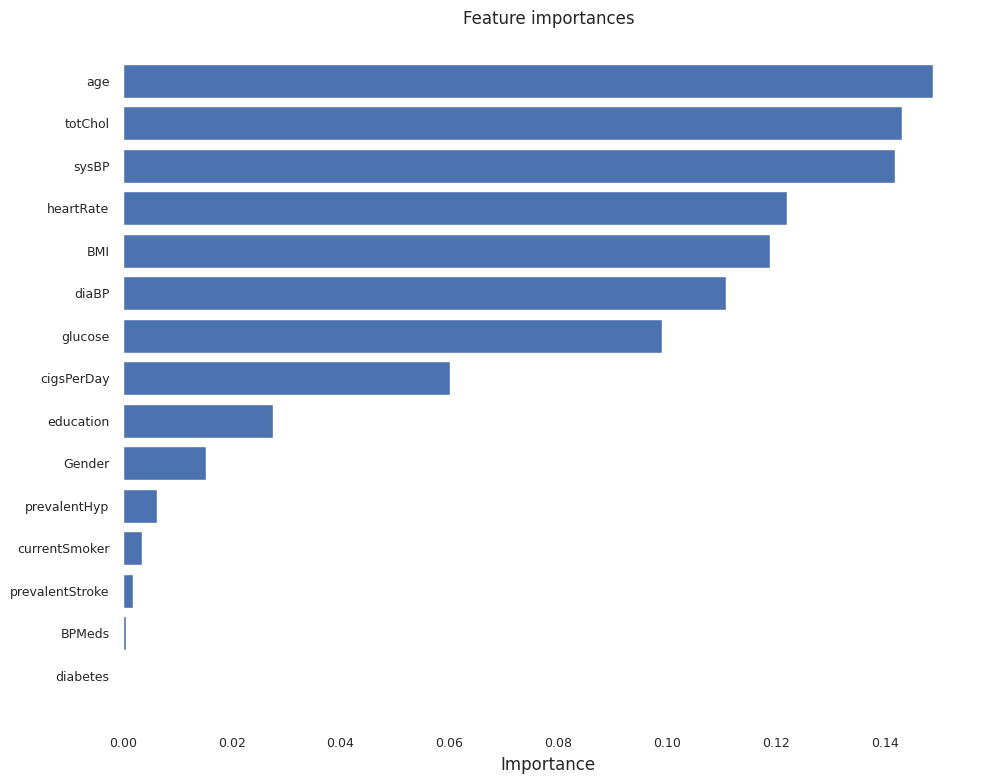

In [33]:
from sklearn.tree import DecisionTreeClassifier as clf
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu Mushrooms
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier as RF
for i in range(1,50):
    rf = RF(n_estimators = i, criterion = 'gini', random_state = 42)
    rf.fit(X_train, y_train)
    print("=============================")
    print("TEST RESULTS GINI DEPTH = ",i,"\n")
    y_pred_dt = dt.predict(X_test)
    #Report
    print('Ramdom Forest Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred_dt)))
    res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
    #Độ chính xác trung bình
    print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
    #Độ lệch chuẩn
    print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
    #Ma trận hỗn hợp
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))
    #Điểm chính xác
    print("Accuracy Score:\t\t{}%".format(round(dt.score(X_test, y_test)*100, 2)))

TEST RESULTS GINI DEPTH =  1 

Ramdom Forest Classifier Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1500
           1       0.98      1.00      0.99      1499

    accuracy                           0.99      2999
   macro avg       0.99      0.99      0.99      2999
weighted avg       0.99      0.99      0.99      2999


Average Accuracy:	0.8920

Standard Deviation:	0.0098

Confusion Matrix:
[[1477   23]
 [   0 1499]]

Accuracy Score:		99.23%
TEST RESULTS GINI DEPTH =  2 

Ramdom Forest Classifier Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1500
           1       0.98      1.00      0.99      1499

    accuracy                           0.99      2999
   macro avg       0.99      0.99      0.99      2999
weighted avg       0.99      0.99      0.99      2999


Average Accuracy:	0.8920

Standard Deviation:	0.0098

Confusion Matrix:
[[1477   23]
 [   

In [35]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50,  random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [36]:
y_pred_rf = rf.predict(X_test)

In [37]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(y_test, y_pred_rf)))
res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(rf.score(X_test, y_test)*100, 2)))

TEST RESULTS:

Random Forest Classifier report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1499

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999


Average Accuracy:	0.9313

Standard Deviation:	0.0050

Confusion Matrix:
[[1498    2]
 [   0 1499]]

Accuracy Score:		99.93%


In [38]:
# Xác thực chéo
# Độ chính xác sau khi test 10 lần của Random
scores = cross_val_score(rf, X, y, cv=10)
print(scores);
print(f'Average accuracy: {scores.mean():.2f}')

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99933289]
Average accuracy: 1.00


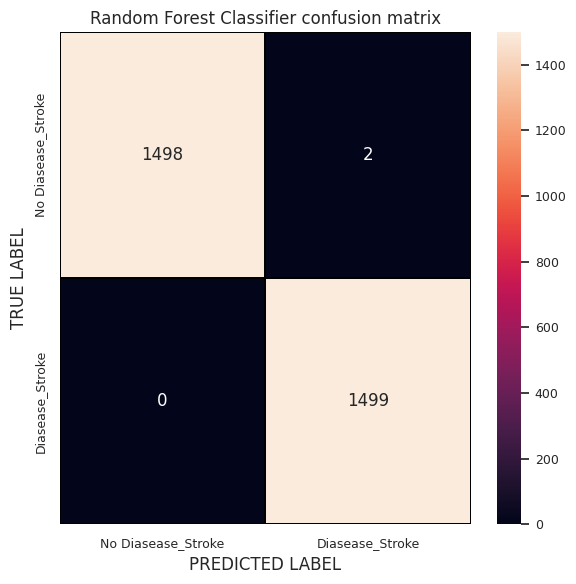

In [39]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_rf = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["No Diasease_Stroke", "Diasease_Stroke"]
y_axis_labels = ["No Diasease_Stroke", "Diasease_Stroke"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_rf, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("rfcm.png", format='png', dpi=150, bbox_inches='tight')
#files.download('rfcm.png')
plt.show()

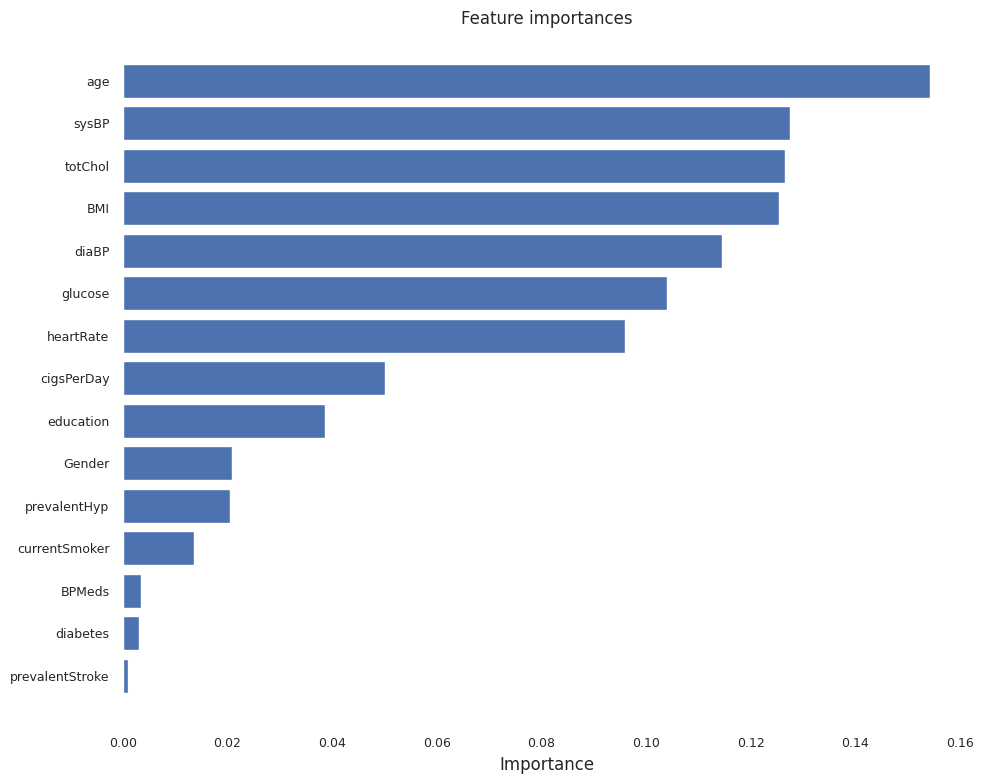

In [40]:
from sklearn.tree import DecisionTreeClassifier as clf
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu Mushrooms
features_list = X.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

# Naïve Bayes

In [41]:

from sklearn.naive_bayes import GaussianNB as NB
nb = NB()
nb.fit(X_train,y_train)

GaussianNB()

In [42]:
y_pred_nb = nb.predict(X_test)

In [43]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Naïve Bayes Classifier report:\n\n{}\n'.format(classification_report(y_test, y_pred_nb)))
res = cross_val_score(nb, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,nb.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(nb.score(X_test, y_test)*100, 2)))

TEST RESULTS:

Naïve Bayes Classifier report:

              precision    recall  f1-score   support

           0       0.57      0.85      0.68      1500
           1       0.71      0.36      0.48      1499

    accuracy                           0.61      2999
   macro avg       0.64      0.61      0.58      2999
weighted avg       0.64      0.61      0.58      2999


Average Accuracy:	0.6122

Standard Deviation:	0.0153

Confusion Matrix:
[[1273  227]
 [ 956  543]]

Accuracy Score:		60.55%


In [44]:
# Xác thực chéo
# Độ chính xác sau khi test 10 lần của Naive Bayes
scores = cross_val_score(nb, X, y, cv=10)
print(scores);
print(f'Average accuracy: {scores.mean():.2f}')

[0.62266667 0.60333333 0.57838559 0.5903936  0.60306871 0.62508339
 0.60040027 0.61174116 0.59439626 0.60507005]
Average accuracy: 0.60


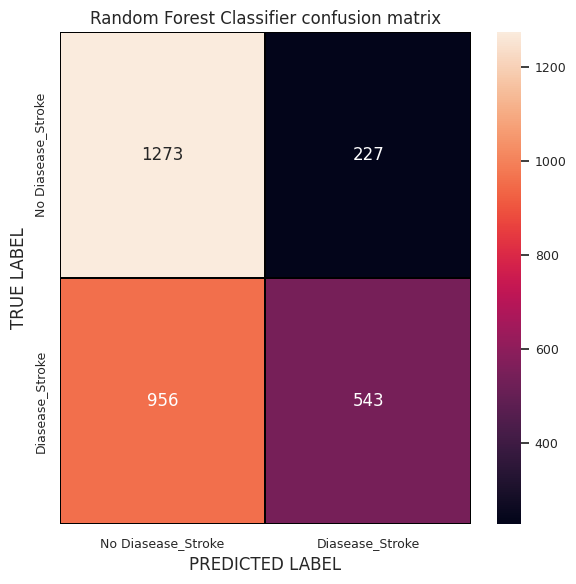

In [45]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_nb = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["No Diasease_Stroke", "Diasease_Stroke"]
y_axis_labels = ["No Diasease_Stroke", "Diasease_Stroke"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_nb, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("rfcm.png", format='png', dpi=150, bbox_inches='tight')
#files.download('rfcm.png')
plt.show()

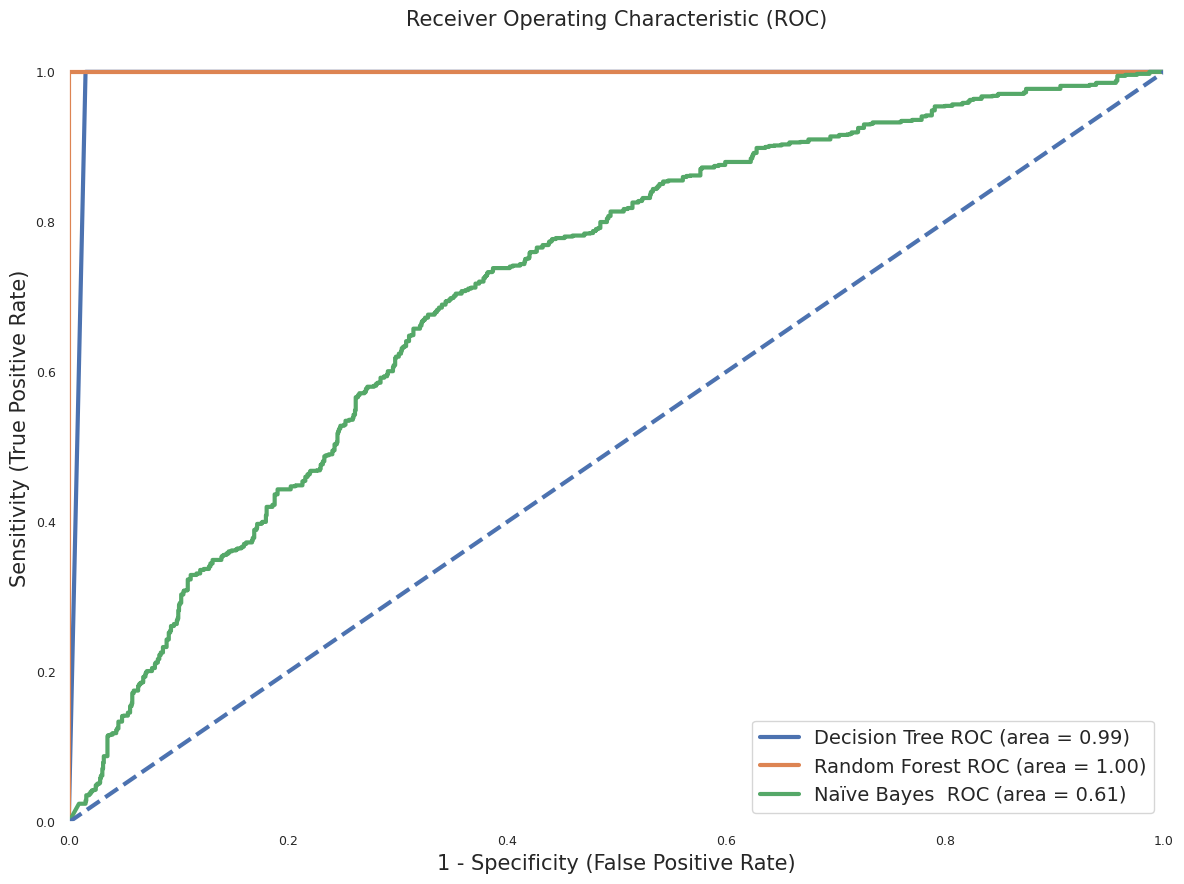

In [46]:
#Visualize mô hình ROC (Receiver Operating Characteristic) Curves - so sánh trực quan các mô hình phân loại
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

plt.figure(figsize=(12,9))
models = [
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'Naïve Bayes ',
    'model': nb,
}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
#plt.savefig("roc_curves.png", format='png', dpi=100, bbox_inches='tight')
#files.download('roc_curves.png')
plt.show()